### Breakdown of night-effect across factors

In [98]:
# 1. First lets scrape a shit ton of data from Yahoo Finance on all Danish and Swedish stocks
import requests


def fetch_yahoo_data(size_of_fetch = 250, offset=0):
    cookies = {
        'A1': 'd=AQABBBYT_2QCEMKYEhA3IJ9hyYNioibOVKgFEgABCAFeAGUvZd8cb2UB9qMAAAcIEhP_ZPBbhOY&S=AQAAAtW9Q2j0umFmlH1kfWnp44Q',
        'A3': 'd=AQABBBYT_2QCEMKYEhA3IJ9hyYNioibOVKgFEgABCAFeAGUvZd8cb2UB9qMAAAcIEhP_ZPBbhOY&S=AQAAAtW9Q2j0umFmlH1kfWnp44Q',
        'GUC': 'AQABCAFlAF5lL0IfGQSV&s=AQAAANsEaC4Q&g=ZP8TIA',
        'A1S': 'd=AQABBBYT_2QCEMKYEhA3IJ9hyYNioibOVKgFEgABCAFeAGUvZd8cb2UB9qMAAAcIEhP_ZPBbhOY&S=AQAAAtW9Q2j0umFmlH1kfWnp44Q',
        'PRF': 't%3DEVAX%252BRENB%252BNVNO%252BAMC%26newChartbetateaser%3D1',
    }

    headers = {
        'authority': 'query1.finance.yahoo.com',
        'accept': '*/*',
        'accept-language': 'da-DK,da;q=0.8',
        'cache-control': 'no-cache',
        'content-type': 'application/json',
        # 'cookie': 'A1=d=AQABBBYT_2QCEMKYEhA3IJ9hyYNioibOVKgFEgABCAFeAGUvZd8cb2UB9qMAAAcIEhP_ZPBbhOY&S=AQAAAtW9Q2j0umFmlH1kfWnp44Q; A3=d=AQABBBYT_2QCEMKYEhA3IJ9hyYNioibOVKgFEgABCAFeAGUvZd8cb2UB9qMAAAcIEhP_ZPBbhOY&S=AQAAAtW9Q2j0umFmlH1kfWnp44Q; GUC=AQABCAFlAF5lL0IfGQSV&s=AQAAANsEaC4Q&g=ZP8TIA; A1S=d=AQABBBYT_2QCEMKYEhA3IJ9hyYNioibOVKgFEgABCAFeAGUvZd8cb2UB9qMAAAcIEhP_ZPBbhOY&S=AQAAAtW9Q2j0umFmlH1kfWnp44Q; PRF=t%3DEVAX%252BRENB%252BNVNO%252BAMC%26newChartbetateaser%3D1',
        'origin': 'https://finance.yahoo.com',
        'pragma': 'no-cache',
        'referer': 'https://finance.yahoo.com/',
        'sec-ch-ua': '"Not.A/Brand";v="8", "Chromium";v="114", "Brave";v="114"',
        'sec-ch-ua-mobile': '?0',
        'sec-ch-ua-platform': '"macOS"',
        'sec-fetch-dest': 'empty',
        'sec-fetch-mode': 'cors',
        'sec-fetch-site': 'same-site',
        'sec-gpc': '1',
        'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36',
    }

    params = {
        'crumb': 'jSTp9qwTDnA',
        'lang': 'en-US',
        'region': 'US',
        'formatted': 'true',
        'corsDomain': 'finance.yahoo.com',
    }

    json_data = {
        'size': size_of_fetch,
        'offset': int(size_of_fetch*offset),
        'sortField': 'intradaymarketcap',
        'sortType': 'DESC',
        'quoteType': 'EQUITY',
        'topOperator': 'AND',
        'query': {
            'operator': 'AND',
            'operands': [
                {
                    'operator': 'or',
                    'operands': [
                        {
                            'operator': 'EQ',
                            'operands': [
                                'region',
                                'dk',
                            ],
                        },
                        {
                            'operator': 'EQ',
                            'operands': [
                                'region',
                                'se',
                            ],
                        },
                    ],
                },
            ],
        },
        'userId': '',
        'userIdType': 'guid',
    }

    response = requests.post(
        'https://query1.finance.yahoo.com/v1/finance/screener',
        params=params,
        cookies=cookies,
        headers=headers,
        json=json_data,
    )

    response_text = json.loads(response.text)
    return response_text

In [99]:
base_data = fetch_yahoo_data(offset=1)

In [101]:
import pandas as pd
import time

size_of_fetch = 250
data = []
for i in range(5):
    base_data = fetch_yahoo_data(size_of_fetch=250, offset=i)
    print("Fetched")
    base_data = base_data['finance']['result'][0]['quotes']
    for symbol in base_data:
        flat_data = {}
        for key, value in symbol.items():
            if isinstance(value, dict):
                for subkey, subvalue in value.items():
                    if subkey == "raw":
                        flat_key = f"{key}_{subkey}"
                        flat_data[flat_key] = subvalue
            else:
                flat_data[key] = value
        data.append(flat_data)
    time.sleep(2)

Fetched
Fetched
Fetched
Fetched
Fetched


In [118]:
data, 

[{'symbol': 'NOVO-B.CO',
  'twoHundredDayAverageChangePercent_raw': 0.15328242,
  'averageAnalystRating': '2.6 - Hold',
  'fiftyTwoWeekLowChangePercent_raw': 0.65286463,
  'language': 'en-US',
  'dividendYield_raw': 1.11,
  'earningsTimestampEnd_raw': 1698906600,
  'regularMarketDayRange_raw': '614.3 - 638.6',
  'epsForward_raw': 21.11,
  'regularMarketDayHigh_raw': 638.6,
  'twoHundredDayAverageChange_raw': 84.35779,
  'twoHundredDayAverage_raw': 550.3422,
  'askSize_raw': 0,
  'bookValue_raw': 20.185,
  'marketCap_raw': 2838378577920,
  'fiftyTwoWeekHighChange_raw': -55.599976,
  'fiftyTwoWeekRange_raw': '384.0 - 690.3',
  'fiftyDayAverageChange_raw': 6.947998,
  'averageDailyVolume3Month_raw': 2897204,
  'exchangeDataDelayedBy': 0,
  'firstTradeDateMilliseconds': 978768000000,
  'dividendRate_raw': 7.08,
  'fiftyTwoWeekChangePercent_raw': 57.825706,
  'trailingAnnualDividendRate_raw': 7.075,
  'fiftyTwoWeekLow_raw': 384.0,
  'regularMarketVolume_raw': 2357871,
  'market': 'dk_market

In [119]:
df = pd.DataFrame(data).loc[:, ["symbol", "averageAnalystRating", "marketCap_raw", "regularMarketVolume_raw",
 "shortName", "currency", "priceToBook_raw", "trailingAnnualDividendYield_raw", "trailingPE_raw"]]

In [120]:
# Extract the numeric part
df['averageAnalystRating'] = df['averageAnalystRating'].str.extract(r'(\d+\.\d+)').astype(float)

In [122]:
clean_df = df.dropna(axis=0, how="any")

In [140]:
import os
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt

def find_data(ticker):
    file_name = f"data/{ticker}_data.csv"
    
    # If data is cached (exists in a local CSV), read from it
    if os.path.exists(file_name):
        data = pd.read_csv(file_name, index_col=0, parse_dates=True)
        is_old_data = data.index[-1] < dt.datetime.today()
        if not is_old_data:
            return data
        
    # Otherwise, download the data and save to a local CSV
    data = yf.download(ticker, start='2000-01-01', progress=False)
    data.to_csv(file_name)
    return data

In [141]:
def night_effect(df):
    night_effect = df['Open']/df['Close'].shift()
    return night_effect

In [142]:
# 1. Calculate the night effect of all tickers
night_effects = []
for ticker in clean_df['symbol'].values:
    data = find_data(ticker).loc['2009-01-01':]
    night = night_effect(data)
    night_effects.append(night)

In [144]:
# 2. Combine to one df and clean it up
df = pd.concat(night_effects, axis=1)
df.columns = clean_df['symbol']
df = df.dropna(axis=0, how="all") # Drop rows if all NaN's

# Find index of the first non-NaN value for each column
first_valid_idx = df.apply(lambda col: col.first_valid_index())

# Replace NaNs with 1s below the first non-NaN value for each column
for col in df.columns:
    idx = first_valid_idx[col]
    if idx is not None:  # if there's at least one non-NaN value in the column
        df.loc[idx:, col] = df.loc[idx:, col].fillna(1)

In [166]:
clean_df

,symbol,averageAnalystRating,marketCap_raw,regularMarketVolume_raw,shortName,currency,priceToBook_raw,trailingAnnualDividendYield_raw,trailingPE_raw
0,NOVO-B.CO,2.6,2.838379e+12,2357871,Novo Nordisk B A/S,DKK,31.444143,0.011307,42.597317
1,AZN.ST,1.9,2.297910e+12,165159,AstraZeneca PLC,SEK,61.038800,0.001971,34.164734
2,ABB.ST,2.0,7.302903e+11,721387,ABB Ltd,SEK,57.238370,0.002310,19.592040
4,ATCO-A.ST,2.5,6.756674e+11,3464406,Atlas Copco AB ser. A,SEK,8.228568,0.015759,27.037382
5,INVE-B.ST,2.4,6.304939e+11,2381721,Investor AB ser. B,SEK,0.938428,0.021205,4.584906
...,...,...,...,...,...,...,...,...,...
671,PENG-B.ST,4.0,2.190023e+08,8951,Projektengagemang Sweden AB ser,SEK,0.381553,0.042735,24.864864
740,IRRAS.ST,2.0,1.394018e+08,129631,IRRAS AB,SEK,3.227778,0.000000,0.562258
741,TSEC.ST,4.0,1.399547e+08,2853,Tempest Security AB,SEK,1.733766,0.000000,24.272728
807,ASAI.ST,2.0,9.546382e+07,31761,Artificial Solutions Internatio,SEK,-0.524775,0.000000,0.558084


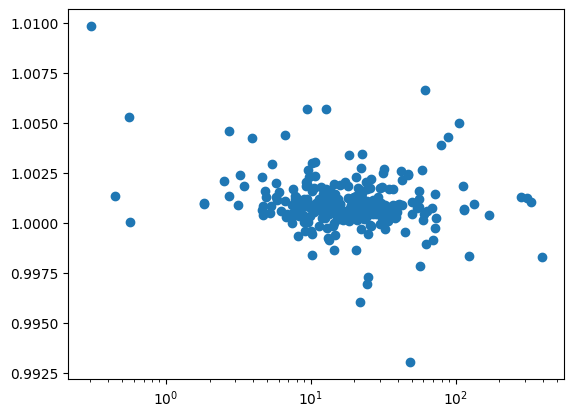

In [170]:
plt.scatter(x=clean_df['trailingPE_raw'], y=df.mean())
plt.xscale('log')

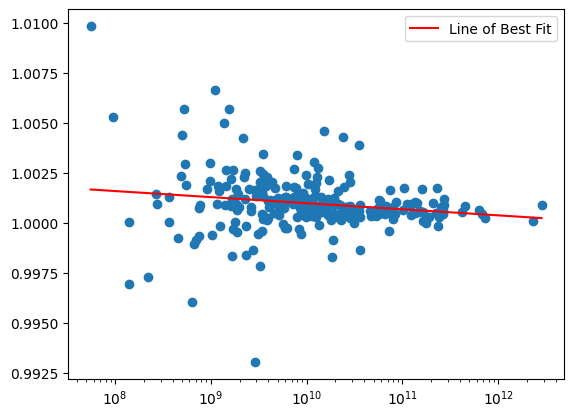

In [164]:
import numpy as np
# Log-transform the x-data
log_x = np.log(clean_df['marketCap_raw'])

# Perform linear regression on the transformed data
slope, intercept = np.polyfit(log_x, df.mean().values, 1)

# Predict y-values based on the regression parameters
predicted_y = slope * log_x + intercept

# Plot the data
plt.scatter(x=clean_df['marketCap_raw'], y=df.mean())
plt.xscale('log')

# Plot the line of best fit
plt.plot(clean_df['marketCap_raw'], predicted_y, color='red', label='Line of Best Fit')
plt.legend()
plt.show()

## Conclusion: There is no systematic reason why the effect occurs in this data